Importing the Required Libraries

In [57]:
!pip install tensorflow==2.4
!pip install keras==2.2.4

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2)
ERROR: No matching distribution found for tensorflow==2.4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

Loading the Data

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

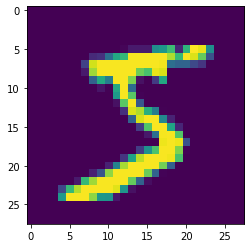

In [7]:
plt.imshow(X_train[0])

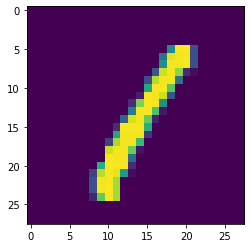

In [8]:
plt.imshow(X_train[3])

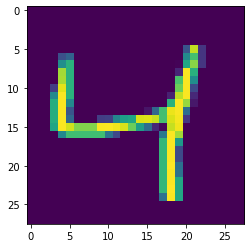

In [9]:
plt.imshow(X_train[2])

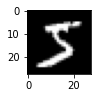

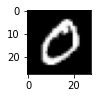

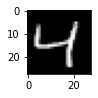

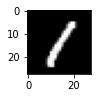

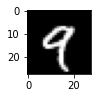

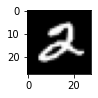

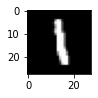

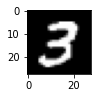

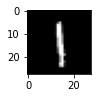

In [10]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

Reshaping the data

In [11]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [12]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [13]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Applying One Hot Encoding

In [14]:
number_of_classes = 20

In [15]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

model creation

In [18]:
model = Sequential()

Add CNN layer

In [19]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

Model compilation

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

Train the model

In [22]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.2048 - accuracy: 0.9536 - val_loss: 0.0946 - val_accuracy: 0.9699
Epoch 2/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0729 - val_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0705 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0690 - val_accuracy: 0.9820


Observing the metrics

In [23]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.06899513304233551, 0.9819999933242798]


Test The Model

In [24]:
prediction = model.predict(X_test[:4])
print(prediction)

[[3.87179311e-15 4.50801099e-14 1.59955989e-11 7.09504733e-10
  1.63028861e-17 1.13760456e-16 3.70970350e-21 1.00000000e+00
  4.32393080e-11 9.84653958e-09 7.02353963e-17 1.57644679e-15
  1.50794959e-16 1.10685627e-16 8.65678326e-17 1.25580761e-16
  1.43756304e-15 7.21669755e-17 4.55122132e-16 3.51109344e-16]
 [8.51999093e-09 1.40375542e-08 1.00000000e+00 1.43915419e-15
  7.18556508e-12 2.43689812e-19 1.77947090e-09 4.03125299e-15
  1.50435376e-11 1.08924725e-16 1.23628501e-18 1.05192764e-16
  6.16323589e-18 7.05498043e-18 9.09867076e-18 4.11259344e-17
  8.68931934e-14 1.72513731e-16 1.11787186e-16 8.66596894e-17]
 [3.95307842e-10 9.99999404e-01 3.26937268e-08 8.39216363e-10
  2.72283160e-07 2.64767275e-09 1.46629417e-10 1.80701520e-07
  1.02865997e-07 1.75855828e-08 2.60907046e-10 2.34375475e-12
  3.15997207e-12 3.91352315e-12 3.67159184e-13 1.26220182e-12
  8.88925322e-10 3.21972895e-12 9.01549289e-13 6.76113636e-12]
 [1.00000000e+00 6.98949195e-16 1.59511779e-11 4.52752229e-13
  4.4

In [25]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing The Metrics

In [26]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 5s 16ms/step - loss: 0.0690 - accuracy: 0.9820
Metrics(Test Loss & Test Accuracy):
[0.06899513304233551, 0.9819999933242798]


Test The Model

In [27]:
prediction = model.predict(X_test[1:5])
print(prediction)

[[8.51999093e-09 1.40375542e-08 1.00000000e+00 1.43915419e-15
  7.18556508e-12 2.43689812e-19 1.77947090e-09 4.03125299e-15
  1.50435376e-11 1.08924725e-16 1.23628501e-18 1.05192764e-16
  6.16323589e-18 7.05498043e-18 9.09867076e-18 4.11259344e-17
  8.68931934e-14 1.72513731e-16 1.11787186e-16 8.66596894e-17]
 [3.95307842e-10 9.99999404e-01 3.26937268e-08 8.39216363e-10
  2.72283160e-07 2.64767275e-09 1.46629417e-10 1.80701520e-07
  1.02865997e-07 1.75855828e-08 2.60907046e-10 2.34375475e-12
  3.15997207e-12 3.91352315e-12 3.67159184e-13 1.26220182e-12
  8.88925322e-10 3.21972895e-12 9.01549289e-13 6.76113636e-12]
 [1.00000000e+00 6.98949195e-16 1.59511779e-11 4.52752229e-13
  4.41745761e-13 3.44773553e-13 2.95118513e-11 1.39135351e-14
  1.24567157e-08 8.34468850e-09 2.43858691e-22 8.35333238e-17
  2.67722862e-17 1.19327765e-16 8.54490411e-17 1.40825696e-17
  8.30405128e-18 3.90553657e-17 4.29171494e-18 2.45762666e-16]
 [1.53126404e-16 9.85562679e-14 3.95290137e-13 2.94912681e-14
  1.0

In [28]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save The Model

In [29]:
model.save("MNIST.h5")

In [31]:
! tar -zcvf model.tgz MNIST.h5

MNIST.h5


In [32]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.5 MB/s eta 0:00:01


In [33]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {"url":"https://us-south.ml.cloud.ibm.com",
                   "apikey":"xK2tUQgdvldPmvEdgdsbuJhsJq28pykvold793f2NdI_"}
client = APIClient(wml_credentials)

In [34]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [35]:
space_uid = guid_from_space_name(client,'Image Model')
print("Space UID = "+ space_uid)

Space UID = 4c872721-4299-44d0-8f47-c1facaed5c8c


In [36]:
client.set.default_space(space_uid)

'SUCCESS'

In [85]:
client.software_specifications.list(limit=150)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [93]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.8")
software_spec_uid

'fe185c44-9a99-5425-986b-59bd1d2eda46'

In [94]:
model_details = client.repository.store_model(model="model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.5",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )
model_id = client.repository.get_model_uid(model_details)

Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=4c872721-4299-44d0-8f47-c1facaed5c8c)
Status code: 400, body: {
  "trace": "8e4deb8af2354dc8e60b450c2015f52b",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported software specification 'tensorflow_2.4-py3.8'.",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


ApiRequestFailure: Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=4c872721-4299-44d0-8f47-c1facaed5c8c)
Status code: 400, body: {
  "trace": "8e4deb8af2354dc8e60b450c2015f52b",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported software specification 'tensorflow_2.4-py3.8'.",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}